In [4]:
# %pip install scipy
# %pip install ripser gudhi
# %pip install scikit-tda
# %pip install numpy
# %pip install tqdm
# %pip install networkx
# %pip install persim

## 1. Preprocessing

In [5]:
from src.preprocessing.preprocessing import *


VR persistence diagram with Ripser

In [6]:
import os
from src.shape.shape import *
from tqdm.notebook import tqdm
# Load preprocessed data

data_path = "data/preprocessed/"
shape_paths = []
for file in os.listdir(data_path):
    if file.endswith(".mat"):
        shape_paths.append(data_path + file)

print(f"Found {len(shape_paths)} shapes... {shape_paths[0], shape_paths[1]}, ...")

shapes = []
for f in tqdm(shape_paths, desc="Loading shapes"):
    shapes.append(load_from_mat(f))
    
print(f"Loaded {len(shapes)} shapes... {shapes[0], shapes[1]}, ...")

Found 148 shapes... ('data/preprocessed/pre_geodesic_gorilla8.mat', 'data/preprocessed/pre_geodesic_victoria1.mat'), ...
Loading shapes...


Loading shapes:   0%|          | 0/148 [00:00<?, ?it/s]

Loaded 148 shapes... (<src.shape.shape.Shape object at 0x1691f6f90>, <src.shape.shape.Shape object at 0x169110ad0>), ...


In [7]:
shape = shapes[0]
print(shape)

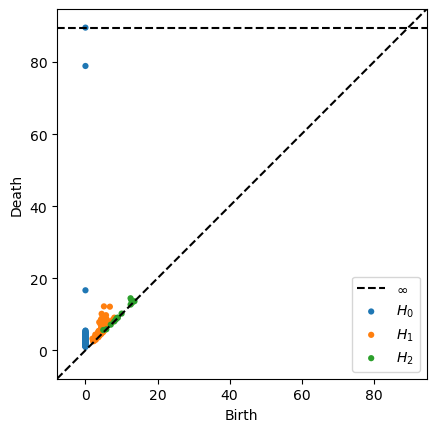

In [8]:
from persim import plot_diagrams
vr = shape.get_VR_diagram()
plot_diagrams(vr, show=True)

Computing dDiam matrix:   0%|          | 0/10952.0 [00:00<?, ?it/s]

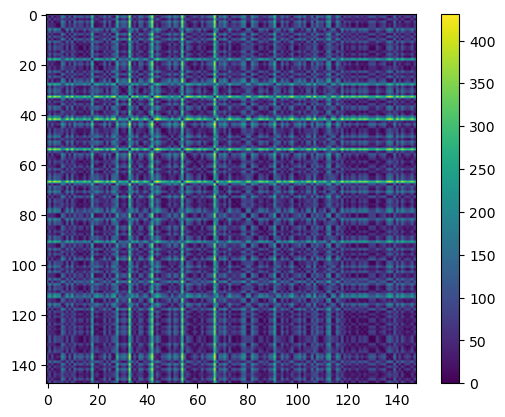

In [9]:
from tqdm.notebook import tqdm
dDiam_matrix = np.zeros((len(shapes), len(shapes)))


tqdm_bar = tqdm(total=len(shapes)**2 / 2, desc = "Computing dDiam matrix")
for i in range(len(shapes)):
    for j in range(i+1, len(shapes)):
        dDiam_matrix[i,j] = dDiam(shapes[i], shapes[j])
        dDiam_matrix[j,i] = dDiam_matrix[i,j]
        tqdm_bar.update(1)

# plot dDiam matrix
import matplotlib.pyplot as plt
plt.imshow(dDiam_matrix)
plt.colorbar()
plt.show()

np.savetxt("data/dDiam_matrix.csv", dDiam_matrix, delimiter=",")
    

Computing d_E_inf matrix:   0%|          | 0/10952.0 [00:00<?, ?it/s]

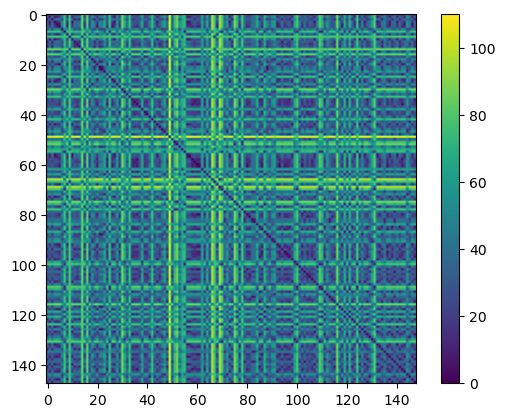

In [10]:
d_E_inf_matrix = np.zeros((len(shapes), len(shapes)))

tqdm_bar = tqdm(total=len(shapes)**2 / 2, desc = "Computing d_E_inf matrix")
for i in range(len(shapes)):
    for j in range(i+1, len(shapes)):
        d_E_inf_matrix[i,j] = d_E_inf(shapes[i], shapes[j])
        d_E_inf_matrix[j,i] = d_E_inf_matrix[i,j]
        tqdm_bar.update(1)

# plot distance matrix
import matplotlib.pyplot as plt
plt.imshow(d_E_inf_matrix)
plt.colorbar()
plt.show()


np.savetxt("data/d_E_inf_matrix.csv", d_E_inf_matrix, delimiter=",")
    

In [11]:
d_G_1_matrix = np.zeros((len(shapes), len(shapes)))
d_G_inf_matrix = np.zeros((len(shapes), len(shapes)))

tqdm_bar = tqdm(total=len(shapes)**2 / 2, desc = "Computing d_G_1 and g_G_inf matrix")
for i in range(len(shapes)):
    for j in range(i+1, len(shapes)):
        d_G_1_matrix[i,j] = d_G_wasserstein(shapes[i], shapes[j], q=1)
        d_G_inf_matrix[i,j] = d_G_wasserstein(shapes[i], shapes[j], q=np.inf)
        d_G_1_matrix[j,i] = d_G_1_matrix[i,j]
        d_G_inf_matrix[j,i] = d_G_inf_matrix[i,j]
        tqdm_bar.update(1)


# plot distance matrix
import matplotlib.pyplot as plt
plt.imshow(d_G_1_matrix)
plt.colorbar()
plt.show()
plt.title("d_G_1")

plt.imshow(d_G_inf_matrix)
plt.colorbar()
plt.show()
plt.title("d_G_inf")

np.savetxt("data/d_G_1_matrix.csv", d_G_1_matrix, delimiter=",")
np.savetxt("data/d_G_inf_matrix.csv", d_G_inf_matrix, delimiter=",")



Computing d_G_1 and g_G_inf matrix:   0%|          | 0/10952.0 [00:00<?, ?it/s]

TypeError: d_G_wasserstein() got an unexpected keyword argument 'p'